In [50]:
from scipy.stats import norm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Барьерные опционы

Пример 1. Оцените стоимость опциона down-and-in колл с датой экспирации через 6 месяцев, если текущая стоимость акции 100, волатильность акции 30\%, барьер 100, цена страйк 90, компенсационная выплата 3. Безрисковая ставка 8\%, стоимость переноса позиции 4\%.

In [51]:
S = 100
H = 100
K = 90
R = 3
T = 0.5
r = 0.08
b = 0.04
q = r - b
sigma = 0.3

In [52]:
def call_di(S, H, K, T, r, q, sigma):
  if S > H:
    return C + E
  else:
    return A - B + D + E

# down-and-in call
eta = 1
phi = 1

mu = (b-sigma**2/2)/sigma**2
lam = np.sqrt(mu**2 + 2*r/sigma**2)

x1 = np.log(S/K)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)
x2 = np.log(S/H)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

y1 = np.log(H**2/S/K)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)
y2 = np.log(H/S)/sigma/np.sqrt(T)      + (1 + mu)*sigma*np.sqrt(T)

z = np.log(H/S)/sigma/np.sqrt(T) + lam*sigma*np.sqrt(T)

A = phi*S*np.exp((b-r)*T)*norm.cdf(phi*x1)-\
phi*K*np.exp(-r*T)*norm.cdf(phi*x1-phi*sigma*np.sqrt(T))

B = phi*S*np.exp((b-r)*T)*norm.cdf(phi*x2)-\
phi*K*np.exp(-r*T)*norm.cdf(phi*x2-phi*sigma*np.sqrt(T))

C = phi*S*np.exp((b-r)*T)*(H/S)**(2*(mu+1))*norm.cdf(eta*y1)-\
phi*K*np.exp(-r*T)*norm.cdf(eta*y1-eta*sigma*np.sqrt(T))*(H/S)**(2*mu)

D = phi*S*np.exp((b-r)*T)*(H/S)**(2*(mu+1))*norm.cdf(eta*y2)-\
phi*K*np.exp(-r*T)*norm.cdf(eta*y2-eta*sigma*np.sqrt(T))*(H/S)**(2*mu)

E = R*np.exp(-r*T)*(norm.cdf(eta*x2-eta*sigma*np.sqrt(T))-(H/S)**(2*mu)*\
                            norm.cdf(eta*y2-eta*sigma*np.sqrt(T)))

F = R*((H/S)**(mu+lam)*norm.cdf(eta*z)+(H/S)**(mu-lam)*norm.cdf(eta*z - 2*eta*lam*sigma*np.sqrt(T)))


print('down-and-in call = ', call_di(S, H, K, T, r, q, sigma))

down-and-in call =  14.88162080496874


В условиях примера 1 напишите универсальную функцию для оценки стоимости 8 видов  барьерных опционов. Для проверки результатов использовать таблицу:
\
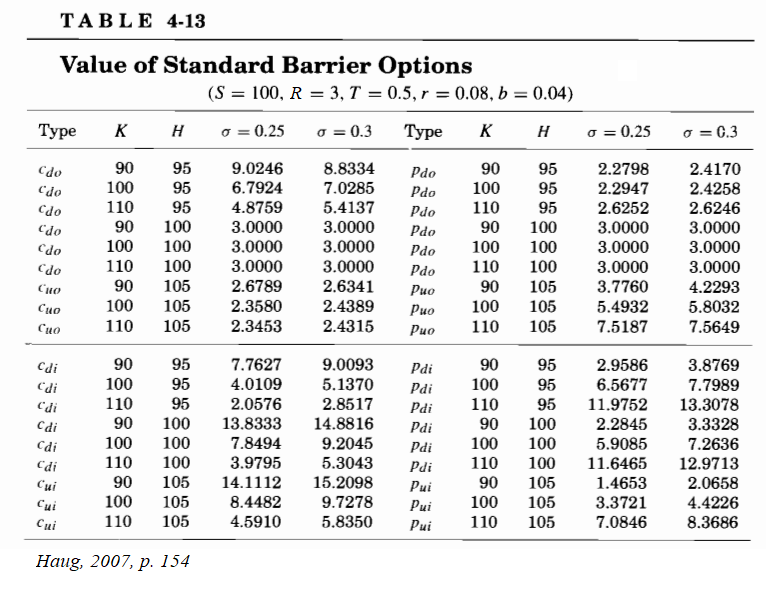

In [53]:
def x1(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return np.log(S/K)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

def x2(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return np.log(S/H)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

def y1(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return np.log(H**2/S/K)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

def y2(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return np.log(H/S)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

def z(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return np.log(H/S)/sigma/np.sqrt(T) + lam*sigma*np.sqrt(T)

def A(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return phi*S*np.exp((b-r)*T)*norm.cdf(phi*x1(S, H, K, R, T, r, b, sigma, phi, eta))-\
    phi*K*np.exp(-r*T)*norm.cdf(phi*x1(S, H, K, R, T, r, b, sigma, phi, eta)-phi*sigma*np.sqrt(T))

def B(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return phi*S*np.exp((b-r)*T)*norm.cdf(phi*x2(S, H, K, R, T, r, b, sigma, phi, eta))-\
    phi*K*np.exp(-r*T)*norm.cdf(phi*x2(S, H, K, R, T, r, b, sigma, phi, eta)-phi*sigma*np.sqrt(T))

def C(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return phi*S*np.exp((b-r)*T)*(H/S)**(2*(mu+1))*norm.cdf(eta*y1(S, H, K, R, T, r, b, sigma, phi, eta))-\
    phi*K*np.exp(-r*T)*norm.cdf(eta*y1(S, H, K, R, T, r, b, sigma, phi, eta)-eta*sigma*np.sqrt(T))*(H/S)**(2*mu)

def D(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return phi*S*np.exp((b-r)*T)*(H/S)**(2*(mu+1))*norm.cdf(eta*y2(S, H, K, R, T, r, b, sigma, phi, eta))-\
    phi*K*np.exp(-r*T)*norm.cdf(eta*y2(S, H, K, R, T, r, b, sigma, phi, eta)-eta*sigma*np.sqrt(T))*(H/S)**(2*mu)

def E(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return R*np.exp(-r*T)*(norm.cdf(eta*x2(S, H, K, R, T, r, b, sigma, phi, eta)-eta*sigma*np.sqrt(T))-(H/S)**(2*mu)*\
                            norm.cdf(eta*y2(S, H, K, R, T, r, b, sigma, phi, eta)-eta*sigma*np.sqrt(T)))

def F(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return R*((H/S)**(mu+lam)*norm.cdf(eta*z(S, H, K, R, T, r, b, sigma, phi, eta))+(H/S)**(mu-lam)*norm.cdf(eta*z(S, H, K, R, T, r, b, sigma, phi, eta) - 2*eta*lam*sigma*np.sqrt(T)))

def di_barrier_call(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = 1
        phi = 1
        return C(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = 1
        phi = 1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - B(S, H, K, R, T, r, b, sigma, phi, eta) \
             + D(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)

def ui_barrier_call(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = -1
        phi = 1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = -1
        phi = 1
        return B(S, H, K, R, T, r, b, sigma, phi, eta) - C(S, H, K, R, T, r, b, sigma, phi, eta) \
             + D(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)

def di_barrier_put(S, H, K, R, T, r, b, sigma):
    if K < H:
        eta = 1
        phi = -1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = 1
        phi = -1
        return B(S, H, K, R, T, r, b, sigma, phi, eta) - C(S, H, K, R, T, r, b, sigma, phi, eta) \
             + D(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)

def ui_barrier_put(S, H, K, R, T, r, b, sigma):
    if K < H:
        eta = -1
        phi = -1
        return C(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = -1
        phi = -1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - B(S, H, K, R, T, r, b, sigma, phi, eta) \
             + D(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
###
def do_barrier_call(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = 1
        phi = 1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - C(S, H, K, R, T, r, b, sigma, phi, eta)\
             + F(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = 1
        phi = 1
        return B(S, H, K, R, T, r, b, sigma, phi, eta) - D(S, H, K, R, T, r, b, sigma, phi, eta)\
             + F(S, H, K, R, T, r, b, sigma, phi, eta)

def uo_barrier_call(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = -1
        phi = 1
        return F(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = -1
        phi = 1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - B(S, H, K, R, T, r, b, sigma, phi, eta) \
             + C(S, H, K, R, T, r, b, sigma, phi, eta) - D(S, H, K, R, T, r, b, sigma, phi, eta) \
             + F(S, H, K, R, T, r, b, sigma, phi, eta)

def do_barrier_put(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = 1
        phi = -1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - B(S, H, K, R, T, r, b, sigma, phi, eta) \
             + C(S, H, K, R, T, r, b, sigma, phi, eta) - D(S, H, K, R, T, r, b, sigma, phi, eta) \
             + F(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = 1
        phi = -1
        return F(S, H, K, R, T, r, b, sigma, phi, eta)

def uo_barrier_put(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = -1
        phi = -1
        return B(S, H, K, R, T, r, b, sigma, phi, eta) - D(S, H, K, R, T, r, b, sigma, phi, eta) \
             + F(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = -1
        phi = -1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - C(S, H, K, R, T, r, b, sigma, phi, eta) \
             + F(S, H, K, R, T, r, b, sigma, phi, eta)

def barrier_option(option_type, S, H, K, R, T, r, b, sigma, is_call):
    if option_type == "Up-and-out" and is_call == True:
        exact_calc_result = uo_barrier_call(S, H, K, R, T, r, b, sigma)

    elif option_type == "Up-and-out" and is_call == False:
        exact_calc_result = uo_barrier_put(S, H, K, R, T, r, b, sigma)

    elif option_type == "Down-and-out" and is_call == True:
        exact_calc_result = do_barrier_call(S, H, K, R, T, r, b, sigma)

    elif option_type == "Down-and-out" and is_call == False:
        exact_calc_result = do_barrier_put(S, H, K, R, T, r, b, sigma)

    elif option_type == "Up-and-in" and is_call == True:
        exact_calc_result = ui_barrier_call(S, H, K, R, T, r, b, sigma)

    elif option_type == "Up-and-in" and is_call == False:
        exact_calc_result = ui_barrier_put(S, H, K, R, T, r, b, sigma)

    elif option_type == "Down-and-in" and is_call == True:
        exact_calc_result = di_barrier_call(S, H, K, R, T, r, b, sigma)

    elif option_type == "Down-and-in" and is_call == False:
        exact_calc_result = di_barrier_put(S, H, K, R, T, r, b, sigma)
    else:
        print("Unknown option type")
        return
    return exact_calc_result

In [54]:
K = 90
H = 95
sigma = 0.25
S = 100
T = 0.5
R = 3
b = 0.04
r = 0.08
option_type = "Down-and-out"
is_call = True
barrier_option(option_type, S, H, K, R, T, r, b, sigma, is_call)

9.02456769496686

## Задача

Задача. Проварьируйте переменные $H$, $K$, $\sigma$, типы опционов и
*   постройте таблицу 4-13 ([Haug, 2007](https://drive.google.com/file/d/1yxjRkchVqvl2xkQFyeB2BKNQ1SKJSTtK/view?usp=sharing)),
*   постройте поверхности для различных $K=\{90, 100, 110\}$, $H=\{95, 100, 105\}$ и $\sigma=0.3$.

In [55]:

S = 100       
R = 3         
T = 0.5       
r = 0.08      
b = 0.04      


H_values = [95, 100, 105]
K_values = [90, 100, 110]
sigma_values = [0.25, 0.3]
option_types = ["Down-and-out", "Up-and-out", "Down-and-in", "Up-and-in"]
is_call_values = [True, False]  

type_labels = {
    ("Down-and-out", True): "c_Doo",
    ("Down-and-out", False): "p_Doo",
    ("Up-and-out", True): "c_Uoo",
    ("Up-and-out", False): "p_Uoo",
    ("Down-and-in", True): "c_Doi",
    ("Down-and-in", False): "p_Doi",
    ("Up-and-in", True): "c_Uoi",
    ("Up-and-in", False): "p_Uoi",
}

results = []


for option_type in option_types:
    for K in K_values:
        for H in H_values:
            for sigma in sigma_values:
                for is_call in is_call_values:
                    
                    try:
                        price = barrier_option(option_type, S, H, K, R, T, r, b, sigma, is_call)
                    except Exception as e:
                        price = None  
                    
                    results.append({
                        'Type': type_labels[(option_type, is_call)],
                        'K': K,
                        'H': H,
                        'σ': sigma,
                        'Price': price
                    })


df_results = pd.DataFrame(results)






In [56]:
df_results

,Type,K,H,σ,Price
0,c_Doo,90,95,0.25,9.024568
1,p_Doo,90,95,0.25,2.279838
2,c_Doo,90,95,0.30,8.833358
3,p_Doo,90,95,0.30,2.416990
4,c_Doo,90,100,0.25,3.000000
...,...,...,...,...,...
139,p_Uoi,110,100,0.30,12.971272
140,c_Uoi,110,105,0.25,4.590969
141,p_Uoi,110,105,0.25,7.084567
142,c_Uoi,110,105,0.30,5.835036


# Структурные продукты с полной защитой капитала

## СП с использованием барьерных опционов

Пример 1. Имеется 0,1 млн рублей, которые клиент готов инвестировать на 1 год. Текущая цена акции 100 руб., прогнозируется
рост акции. Постройте структурный продукт с полной гарантией
возврата инвестированного капитала и использованием барьерных
опционов:

а) включаемый (knock-in) барьер 110 рублей, цена акции через год –
105 руб.,

б) выключаемый (knock-out) барьер 90 рублей, цена акции через год –
120 руб.

Волатильность акции – 30%, депозитная процентная ставка и безрисковая процентная ставка – 7%. Периодичность наблюдения – 1
день.

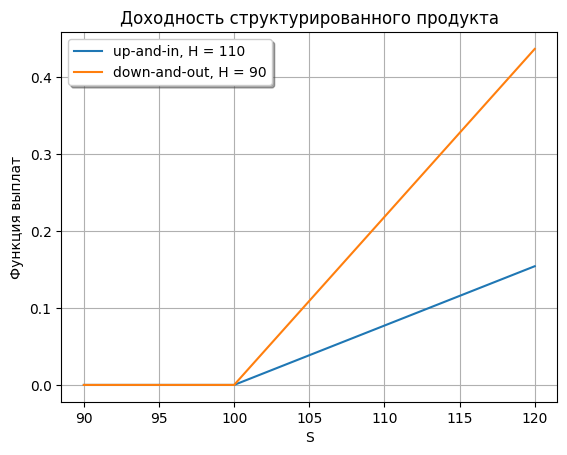

In [58]:
S0 = 100
T = 1
N = 100000
sigma = 0.3
r = 0.07
S_data = np.linspace(90, 120, 100)

H_1 = 110
K_1 = 105
option_type = 'Up-and-in'
is_call = True
call_1 = barrier_option(option_type, S0, H_1, K_1, 0, T, r, 0, sigma, is_call)

H_2 = 90
K_2 = 120
option_type = 'Down-and-out'
is_call = True
call_2 = barrier_option(option_type, S0, H_2, K_2, 0, T, r, 0, sigma, is_call)

capital_guarantee = 1
r_sp_min = capital_guarantee - 1
da = N * np.exp(-r * T) * capital_guarantee

Q_1 = (N - da) / call_1
PR_1 = K_1 * Q_1/ N
r_sp_1 = np.maximum(r_sp_min, r_sp_min + PR_1 *(S_data - S0) / S0 )

Q_2 = (N - da) / call_2
PR_2 = K_2 * Q_2/ N
r_sp_2 = np.maximum(r_sp_min, r_sp_min + PR_2 *(S_data - S0) / S0 )

plt.plot(S_data, r_sp_1, label = 'up-and-in, H = 110')
plt.plot(S_data, r_sp_2, label = 'down-and-out, H = 90')
plt.title('Доходность структурированного продукта')
plt.xlabel('S')
plt.ylabel('Функция выплат')
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)

## Задача

Задача. Сравните полученные результаты с функциями выплат, полученными при использовании гэп опционов, бинарных опционов (ЛБ2). Подкрепите выводы иллюстративными графиками.

Постройте зависимость стоимости барьерного опциона (Knock-out call, Knock-in call, Knock-out put Knock-in put) от расположения барьера: x – это барьер в процентах от цены (50, 500), y - стоимость барьерного опциона в % от стоимости обычного call.

Постройте графики зависимость КоУ от расположения барьера относительно страйка для продуктов: с knock-out call, knock-in call и ванильный кол; с knock-out put, knock-in put и ванильный call.

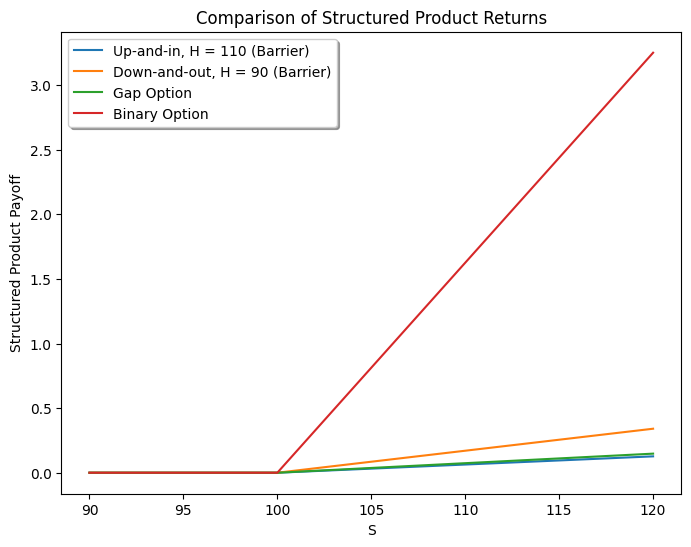

In [59]:
def binary_option_call(option_type, S, K, T, r, q, sigma):
    d1 = (np.log(S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'cash-or-nothing':
        return np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'asset-or-nothing':
        return S * np.exp(-q * T) * norm.cdf(d1)

def gap_option_price_call(S, K1, K2, T, r, q, sigma):
    d1 = (np.log(S / K2) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * np.exp(-q * T) * norm.cdf(d1) - K1 * np.exp(-r * T) * norm.cdf(d2)





H_up_in, K_up_in = 110, 105
call_up_in = barrier_option('Up-and-in', S0, H_up_in, K_up_in, q, T, r, q, sigma, True)

H_down_out, K_down_out = 90, 120
call_down_out = barrier_option('Down-and-out', S0, H_down_out, K_down_out, q, T, r, q, sigma, True)

gap_call = gap_option_price_call(S0, K1=K_up_in, K2=K_down_out, T=T, r=r, q=q, sigma=sigma)
binary_call = binary_option_call('cash-or-nothing', S0, K_up_in, T, r, q, sigma)


capital_guarantee = 1
r_sp_min = capital_guarantee - 1
da = N * np.exp(-r * T) * capital_guarantee

# Payoff calculations
def structured_payoff(option_price, strike, N, S_data, S0):
    Q = (N - da) / option_price if option_price > 0 else 0
    PR = strike * Q / N
    return np.maximum(r_sp_min, r_sp_min + PR * (S_data - S0) / S0)

r_sp_up_in = structured_payoff(call_up_in, K_up_in, N, S_data, S0)
r_sp_down_out = structured_payoff(call_down_out, K_down_out, N, S_data, S0)
r_sp_gap = structured_payoff(gap_call, K_up_in, N, S_data, S0)
r_sp_binary = structured_payoff(binary_call, K_up_in, N, S_data, S0)


plt.figure(figsize=(8, 6))
plt.plot(S_data, r_sp_up_in, label='Up-and-in, H = 110 (Barrier)', linestyle='-')
plt.plot(S_data, r_sp_down_out, label='Down-and-out, H = 90 (Barrier)', linestyle='-')
plt.plot(S_data, r_sp_gap, label='Gap Option', linestyle='-')
plt.plot(S_data, r_sp_binary, label='Binary Option', linestyle='-')
plt.title('Comparison of Structured Product Returns')
plt.xlabel('S')
plt.ylabel('Structured Product Payoff')
# plt.ylim()
plt.legend(loc='best', fancybox=True, shadow=True)
plt.show()

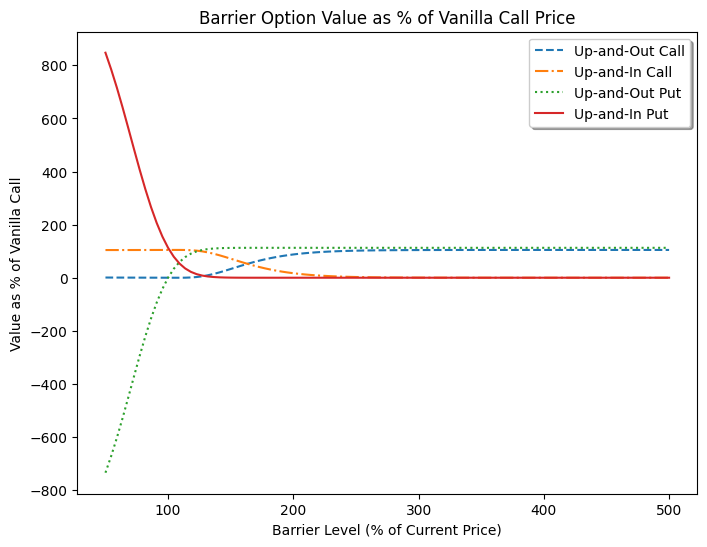

In [60]:

def vanilla_call_price(S, K, T, r, q, sigma):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

vanilla_call = vanilla_call_price(S0, K_up_in, T, r, q, sigma)


barrier_levels = np.linspace(50, 500, 100)


up_and_out_call = [
    barrier_option('Up-and-out', S0, H, K_up_in, q, T, r, q, sigma, True) for H in barrier_levels
]
up_and_in_call = [
    barrier_option('Up-and-in', S0, H, K_up_in, q, T, r, q, sigma, True) for H in barrier_levels
]
up_and_out_put = [
    barrier_option('Up-and-out', S0, H, K_up_in, q, T, r, q, sigma, False) for H in barrier_levels
]
up_and_in_put = [
    barrier_option('Up-and-in', S0, H, K_up_in, q, T, r, q, sigma, False) for H in barrier_levels
]

up_and_out_call_pct = [v / vanilla_call * 100 for v in up_and_out_call]
up_and_in_call_pct = [v / vanilla_call * 100 for v in up_and_in_call]
up_and_out_put_pct = [v / vanilla_call * 100 for v in up_and_out_put]
up_and_in_put_pct = [v / vanilla_call * 100 for v in up_and_in_put]

plt.figure(figsize=(8, 6))
plt.plot(barrier_levels, up_and_out_call_pct, label='Up-and-Out Call', linestyle='--')
plt.plot(barrier_levels, up_and_in_call_pct, label='Up-and-In Call', linestyle='-.')
plt.plot(barrier_levels, up_and_out_put_pct, label='Up-and-Out Put', linestyle=':')
plt.plot(barrier_levels, up_and_in_put_pct, label='Up-and-In Put', linestyle='-')
plt.title('Barrier Option Value as % of Vanilla Call Price')
plt.xlabel('Barrier Level (% of Current Price)')
plt.ylabel('Value as % of Vanilla Call')
plt.legend(loc='best', fancybox=True, shadow=True)

plt.show()


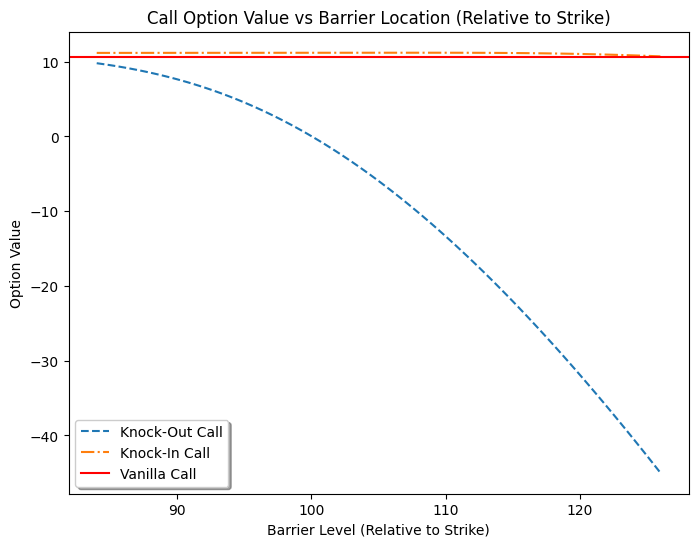

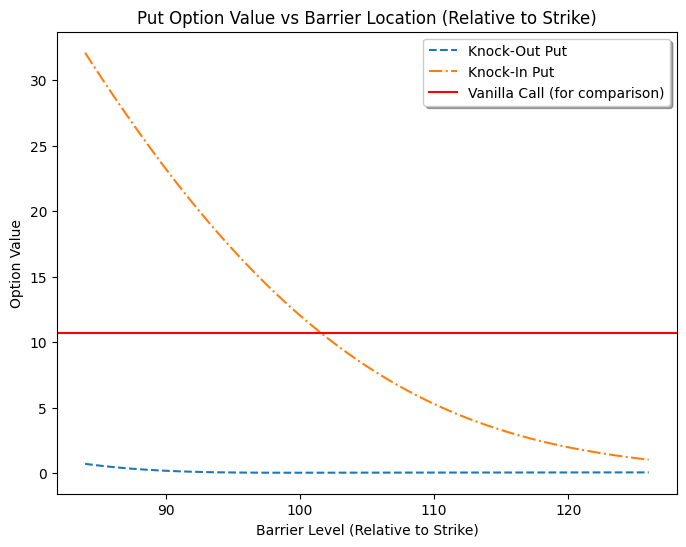

In [61]:

vanilla_call = vanilla_call_price(S0, K_up_in, T, r, q, sigma)

barrier_levels_relative = np.linspace(0.8 * K_up_in, 1.2 * K_up_in, 100)


knock_out_call_values = [
    barrier_option('Down-and-out', S0, H, K_up_in, q, T, r, q, sigma, True) for H in barrier_levels_relative
]
knock_in_call_values = [
    barrier_option('Up-and-in', S0, H, K_up_in, q, T, r, q, sigma, True) for H in barrier_levels_relative
]
knock_out_put_values = [
    barrier_option('Down-and-out', S0, H, K_up_in, q, T, r, q, sigma, False) for H in barrier_levels_relative
]
knock_in_put_values = [
    barrier_option('Up-and-in', S0, H, K_up_in, q, T, r, q, sigma, False) for H in barrier_levels_relative
]


plt.figure(figsize=(8, 6))
plt.plot(barrier_levels_relative, knock_out_call_values, label='Knock-Out Call', linestyle='--')
plt.plot(barrier_levels_relative, knock_in_call_values, label='Knock-In Call', linestyle='-.')
plt.axhline(y=vanilla_call, color='r', linestyle='-', label='Vanilla Call')
plt.title('Call Option Value vs Barrier Location (Relative to Strike)')
plt.xlabel('Barrier Level (Relative to Strike)')
plt.ylabel('Option Value')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.show()


vanilla_put = vanilla_call_price(S0, K_up_in, T, r, q, sigma)  
plt.figure(figsize=(8, 6))
plt.plot(barrier_levels_relative, knock_out_put_values, label='Knock-Out Put', linestyle='--')
plt.plot(barrier_levels_relative, knock_in_put_values, label='Knock-In Put', linestyle='-.')
plt.axhline(y=vanilla_put, color='r', linestyle='-', label='Vanilla Call (for comparison)')
plt.title('Put Option Value vs Barrier Location (Relative to Strike)')
plt.xlabel('Barrier Level (Relative to Strike)')
plt.ylabel('Option Value')
plt.legend(loc='best', fancybox=True, shadow=True)

plt.show()



# Торговая стратегия (индивидуально)

## Проект

Задача. Торговая стратегия на основе опционного контракта Callable Bull or Bear Contract (CBBC).


[CBBC](https://https://www.hkex.com.hk/-/media/HKEX-Market/Products/Securities/Structured-Products/Product-Sheet/ProductSheet_CBBC.pdf) -- барьерный инструмент с эффектом рычага, в котором отслеживается цена базового актива.
Покупка (продажа) контракта Callable Bull (Bear) подразумевает, что инвестор занял длинную (короткую) позицию по базовому активу и имеет право на прибыль, когда стоимость этого актива вырастет (упадет).

Для контракта на повышение цены (Сallable Bull) цена включения (тригер) устанавливается либо на уровне цены страйка, либо выше. Обязательное событие включения (Mandatory Call Even, MCE) происходит, когда цена базового актива достигает цены тригера. Когда это происходит, торговля контрактом прекращается, сам контракт отзывается, и держатель контракта получает компенсацию в соответствии с заранее установленными условиями. Для контракта на понижение цены, цена включения (тригер) устанавливается либо на уровне цены страйка, либо ниже.

Разработайте торговую стратегию:
1.  Постройте прогноз дневных максимумов и минимумов для базового актива (например, через регрессию).
1.  Сигнал на покупку генерируется, когда прогнозируемый дневной максимум не ниже цены контракта.
1.  Купите базовый актив, когда сигнал на покупку наблюдается в течение $m$ последовательных дней.
1.  Закройте длинную позицию, когда сигнал на покупку исчезает в течение $m$ последовательных дней, происходит MCE или истекает срок действия контракта CBBC.
1.  Если позиция закрывается до MCE и срока действия контракта, то повторите шаги 2–4.

Проварьируйте параметр $m$ и проанализируейте P&L торговой стратегии.

[Исторические данные CBBC](https://www.hkex.com.hk/Products/Securities/Structured-Products/Trading-Information-and-Historical-Data?sc_lang=en)  

Статья ([Cheung et.al., 2010](https://www.sciencedirect.com/science/article/pii/S0927538X09000778?via%3Dihub)) или ([Cheung et.al., 2010](https://drive.google.com/file/d/1psFxTOZ8nf5IVuBcWKuKTEQ-JeJsRGPI/view?usp=drive_link))


In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv('./CBBC49517.csv', 
                   sep=';',  
                   skiprows=3,  
                   skip_blank_lines=True)  

In [27]:
data.head()

,Unnamed: 0,Bought *,Unnamed: 2,Sold *,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,22.11.2024,0,0.0,-130,(0.225308),140,0.07,"200,000,000",HKD,0.228,...,R,20.09.2024,-,30.08.2027,No,-,16888,16988,10000,-
1,21.11.2024,0,0.0,0,0.000000,10,0.01,"200,000,000",HKD,0.000,...,R,20.09.2024,-,30.08.2027,No,-,16888,16988,10000,-
2,20.11.2024,0,0.0,0,0.000000,10,0.01,"200,000,000",HKD,0.000,...,R,20.09.2024,-,30.08.2027,No,-,16888,16988,10000,-
3,19.11.2024,0,0.0,0,0.000000,10,0.01,"200,000,000",HKD,0.000,...,R,20.09.2024,-,30.08.2027,No,-,16888,16988,10000,-
4,18.11.2024,0,0.0,0,0.000000,10,0.01,"200,000,000",HKD,0.000,...,R,20.09.2024,-,30.08.2027,No,-,16888,16988,10000,-


In [28]:
new_column_names = [
    "Trade Date", "No. of CBBC Bought *", "Average price *", "No. of CBBC Sold *",
    "Average price * (Sold)", "O/S *", "O/S * (%)", "Total Issue Size *", "Trading Currency",
    "Day High", "Day Low", "Closing Price", "Volume", "Turnover", "Issuer", "UL",
    "Bull/Bear", "CBBC Type", "CBBC Category", "Listing Date", "Last Trading Date",
    "Maturity Date", "MCE", "Strike/Call Currency", "Strike Level", "Call Level",
    "Ent. Ratio^", "Delisting"
]

data.columns = new_column_names

In [29]:
df = data.copy()

In [33]:
df['Trade Date'] = pd.to_datetime(df['Trade Date'])
df['Maturity Date'] = pd.to_datetime(df['Maturity Date'])



df['MCE'] = df['MCE'].map({'Yes': True, 'No': False, 'yes': True, 'no': False})
df['MCE'] = df['MCE'].fillna(False) 

C:\Users\Астемир\AppData\Local\Temp\ipykernel_11248\1217302625.py:1: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Trade Date'] = pd.to_datetime(df['Trade Date'])
C:\Users\Астемир\AppData\Local\Temp\ipykernel_11248\1217302625.py:2: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Maturity Date'] = pd.to_datetime(df['Maturity Date'])
C:\Users\Астемир\AppData\Local\Temp\ipykernel_11248\1217302625.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['MCE'] = df['MCE'].fillna(False)


In [35]:
required_columns = ['Day High', 'Day Low', 'Closing Price', 'MCE', 'Maturity Date']
for col in required_columns:
    if col not in df.columns:
        print(f"Столбец {col} отсутствует в данных.")
    else:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [36]:
df.dropna(subset=['Trade Date', 'Maturity Date', 'Closing Price', 'MCE', 'Day High', 'Day Low'], inplace=True)

df.sort_values('Trade Date', inplace=True)
df.reset_index(drop=True, inplace=True)

df['Prev_High'] = df['Day High'].shift(1)
df['Prev_Low'] = df['Day Low'].shift(1)
df['Prev2_High'] = df['Day High'].shift(2)
df['Prev2_Low'] = df['Day Low'].shift(2)
df['Prev3_High'] = df['Day High'].shift(3)
df['Prev3_Low'] = df['Day Low'].shift(3)


df.dropna(inplace=True)


features = ['Prev_High', 'Prev_Low', 'Prev2_High', 'Prev2_Low', 'Prev3_High', 'Prev3_Low']
target_high = 'Day High'
target_low = 'Day Low'

In [37]:
split_index = int(len(df) * 0.8)
X_train = df[features][:split_index]
X_test = df[features][split_index:]
y_train_high = df[target_high][:split_index]
y_test_high = df[target_high][split_index:]
y_train_low = df[target_low][:split_index]
y_test_low = df[target_low][split_index:]

In [40]:
model_high = RandomForestRegressor(n_estimators=100, random_state=42)
model_high.fit(X_train, y_train_high)

model_low = RandomForestRegressor(n_estimators=100, random_state=42)
model_low.fit(X_train, y_train_low)

RandomForestRegressor(random_state=42)

In [41]:
df['Forecast_High'] = model_high.predict(df[features])
df['Forecast_Low'] = model_low.predict(df[features])

In [47]:
print(df[['Day High', 'Day Low']].head())
print(df[['Day High', 'Day Low']].describe())


   Day High  Day Low
3       0.0      0.0
4       0.0      0.0
5       0.0      0.0
6       0.0      0.0
7       0.0      0.0
       Day High  Day Low
count      17.0     17.0
mean        0.0      0.0
std         0.0      0.0
min         0.0      0.0
25%         0.0      0.0
50%         0.0      0.0
75%         0.0      0.0
max         0.0      0.0


In [48]:
print(df[features].head())
print(df[features].describe())


   Prev_High  Prev_Low  Prev2_High  Prev2_Low  Prev3_High  Prev3_Low
3        0.0       0.0         0.0        0.0         0.0        0.0
4        0.0       0.0         0.0        0.0         0.0        0.0
5        0.0       0.0         0.0        0.0         0.0        0.0
6        0.0       0.0         0.0        0.0         0.0        0.0
7        0.0       0.0         0.0        0.0         0.0        0.0
       Prev_High  Prev_Low  Prev2_High  Prev2_Low  Prev3_High  Prev3_Low
count       17.0      17.0        17.0       17.0        17.0       17.0
mean         0.0       0.0         0.0        0.0         0.0        0.0
std          0.0       0.0         0.0        0.0         0.0        0.0
min          0.0       0.0         0.0        0.0         0.0        0.0
25%          0.0       0.0         0.0        0.0         0.0        0.0
50%          0.0       0.0         0.0        0.0         0.0        0.0
75%          0.0       0.0         0.0        0.0         0.0        0.0
ma

In [46]:
mse_high = mean_squared_error(y_test_high, model_high.predict(X_test))
mse_low = mean_squared_error(y_test_low, model_low.predict(X_test))
print(f"MSE для прогнозирования максимальной цены: {mse_high}")
print(f"MSE для прогнозирования минимальной цены: {mse_low}")

MSE для прогнозирования максимальной цены: 0.0
MSE для прогнозирования минимальной цены: 0.0


# Примеры на барьерные опционы

Zhang, c. 223

Пример 2.
Вычислите цену опциона down-and-in колл, если цена страйк  равна 98, цена исполнения через полгода 92. Цена акции 100, барьер 95, безрисковая ставка 8%, дивидендная доходность 3%, волатильность 20%.

Вычислить значение компенсационной выплаты по полугодовому барьерному опциону down-and-in колл на начальный момент, при условии, что эта выплата равна 1.5 на дату экспирации, если барьер не достигнут. Цена акции 100, барьер 95, волатильность 0.2, безрисковая ставка 0.08, дивидентная ставка 0.03.

In [ ]:
S = 100
H = 95
K = 98

T = 0.5
r = 0.08
q = 0.03
R_T = 1.5

sigma = 0.2

# if K = 98 > H = 95

d1 = (np.log(H**2/S/K) + (r-q-sigma**2/2)*T)/(sigma * np.sqrt(T))
d2 = d1 + sigma * np.sqrt(T)
# print(d1);print(d2)

price_down_in_call = (H/S)**(2*(r-q-sigma**2/2)/sigma**2)*(H**2/S*np.exp(-q*T)*norm.cdf(d2)-K*np.exp(-r*T)*norm.cdf(d1))
print('price_down_in_call = ', price_down_in_call)

d1 = (np.log(S/H) + (r-q-sigma**2/2)*T)/(sigma * np.sqrt(T))
d2 = (np.log(H/S) + (r-q-sigma**2/2)*T)/(sigma * np.sqrt(T))

R = R_T * np.exp(-r*T)*(norm.cdf(d1)- (H/S)**((2*0.03)/sigma**2)*norm.cdf(d2))
print('rebate = ', R)

price_down_in_call =  2.7338748685456857
rebate =  0.448464125401398


Задача. В условиях примера 2 вычислить стоимость опциона, если цена страйк 92 (ниже барьера).

In [ ]:
K = 92
call = barrier_option('Down-and-in',S, H, K, R, T, r, b, sigma, is_call=True)
print(f"call price = {call}")


call price = 4.892727517998941


---

* Торговая стратегия "Разделяй и властвуй"
    - Эта стратегия использует концепцию разделения на сильные тренды и периоды консолидации. Основные шаги стратегии:

    - Идентификация тренда: Определяем направление рынка, используя индикаторы, такие как скользящие средние.
    - Анализ волатильности: Определяем периоды высокой и низкой волатильности, чтобы лучше планировать входы и выходы.
* Торговые правила:
    - Входим в тренд, если он подтвержден направлением рынка и высокой волатильностью.
    - Ждем консолидации для контртрендовых сделок.

[*********************100%***********************]  1 of 1 completed


C:\Users\Астемир\AppData\Local\Temp\ipykernel_13660\2505147212.py:60: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Position'].iloc[i] = -1  # Открытие короткой позиции
C:\Users\Астемир\AppData\Local\Temp\ipykernel_13660\2505147212.py

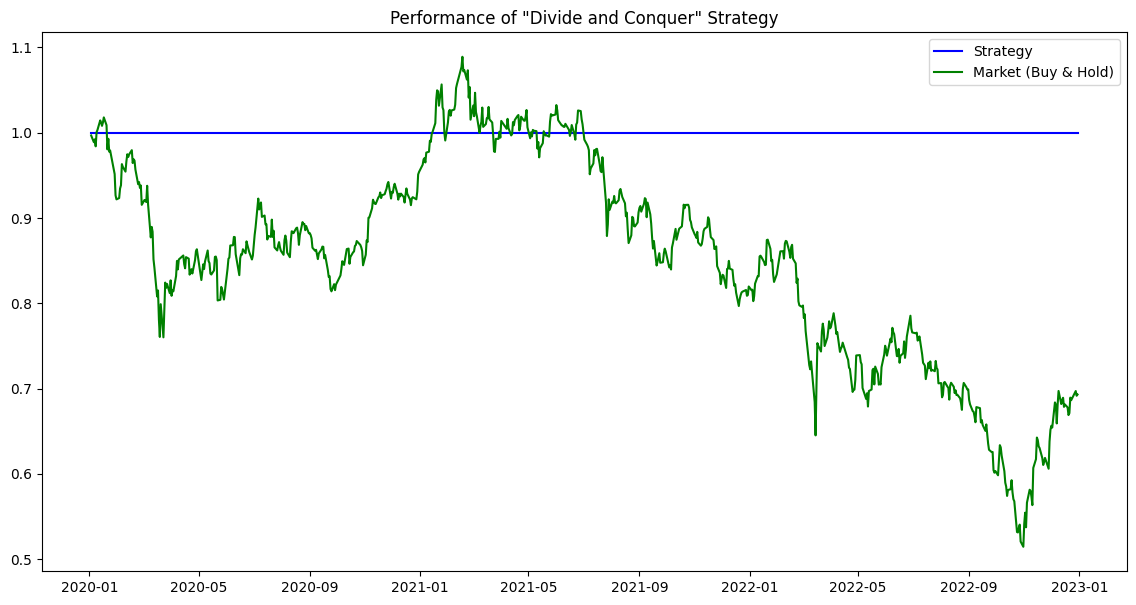

In [ ]:
import yfinance as yf


def load_data(ticker, start, end):
    """
    Загружает исторические данные для заданного тикера.
    """
    data = yf.download(ticker, start=start, end=end)
    data = data[['High', 'Low', 'Close']]
    return data


def calculate_moving_averages(data, short_window=20, long_window=50):
    """
    Добавляет в DataFrame короткие и длинные скользящие средние.
    """
    data['SMA_Short'] = data['Close'].rolling(window=short_window).mean()
    data['SMA_Long'] = data['Close'].rolling(window=long_window).mean()
    return data


def calculate_volatility(data, window=14):
    """
    Расчет индикатора волатильности - истинного диапазона (ATR).
    """
    data['TR'] = np.maximum(
        data['High'] - data['Low'],
        np.maximum(abs(data['High'] - data['Close'].shift(1)), abs(data['Low'] - data['Close'].shift(1)))
    )
    data['ATR'] = data['TR'].rolling(window=window).mean()
    return data

def generate_signals(data):
    """
    Генерация сигналов на основе пересечения скользящих средних и волатильности.
    """
    data['Trend_Signal'] = np.where(data['SMA_Short'] > data['SMA_Long'], 1, -1)  # Трендовый сигнал
    data['Volatility_High'] = data['ATR'] > data['ATR'].rolling(window=20).mean()  # Высокая волатильность
    data['Trade_Signal'] = np.where((data['Trend_Signal'] == 1) & data['Volatility_High'], 1, 
                                    np.where((data['Trend_Signal'] == -1) & data['Volatility_High'], -1, 0))
    return data

# === Шаг 4: Логика торговли ===
def apply_trading_logic(data):
    """
    Определение входов и выходов на основе сигналов.
    """
    data['Position'] = 0
    in_position = False
    
    for i in range(len(data)):
        if not in_position:
            if data['Trade_Signal'].iloc[i] == 1:
                data['Position'].iloc[i] = 1  # Открытие длинной позиции
                in_position = True
            elif data['Trade_Signal'].iloc[i] == -1:
                data['Position'].iloc[i] = -1  # Открытие короткой позиции
                in_position = True
        else:
            if data['Trade_Signal'].iloc[i] == 0:
                data['Position'].iloc[i] = 0  # Закрытие позиции
                in_position = False
    return data


def calculate_pnl(data):
    """
    Расчет ежедневной доходности и кумулятивного P&L.
    """
    data['Daily_Return'] = data['Close'].pct_change()
    data['Strategy_Return'] = data['Position'].shift(1) * data['Daily_Return']
    data['Cumulative_Strategy'] = (1 + data['Strategy_Return']).cumprod()
    data['Cumulative_Market'] = (1 + data['Daily_Return']).cumprod()
    return data


def plot_results(data):
    """
    График производительности стратегии.
    """
    plt.figure(figsize=(14, 7))
    plt.plot(data['Cumulative_Strategy'], label='Strategy', color='blue')
    plt.plot(data['Cumulative_Market'], label='Market (Buy & Hold)', color='green')
    plt.title('Performance of "Divide and Conquer" Strategy')
    plt.legend()
    plt.show()


def main():
    # 1. Загрузка данных
    ticker = "^HSI"
    start_date = "2020-01-01"
    end_date = "2023-01-01"
    data = load_data(ticker, start_date, end_date)
    
    # 2. Индикаторы тренда и волатильности
    data = calculate_moving_averages(data)
    data = calculate_volatility(data)
    
    # 3. Генерация сигналов
    data = generate_signals(data)
    
    # 4. Логика торговли
    data = apply_trading_logic(data)
    
    # 5. Подсчет прибыли
    data = calculate_pnl(data)
    
   
    plot_results(data)


if __name__ == "__main__":
    main()


In [13]:

def load_data(ticker, start, end):
    """
    Загружает исторические данные для заданного тикера.
    """
    data = yf.download(ticker, start=start, end=end)
    data['Day'] = range(len(data))  
    return data[['High', 'Low', 'Close', 'Day']]

# === Шаг 2: Построение прогнозов ===
def predict_high_low(data, window=5):
    """
    Строит прогноз дневных максимумов и минимумов с использованием линейной регрессии.
    """
    data['Predicted_High'] = np.nan
    data['Predicted_Low'] = np.nan

    for i in range(window, len(data)):
        
        recent_data = data.iloc[i-window:i]
        
        
        model_high = LinearRegression()
        model_high.fit(recent_data[['Day']], recent_data['High'])
        data.loc[data.index[i], 'Predicted_High'] = model_high.predict([[data['Day'].iloc[i]]])

        
        model_low = LinearRegression()
        model_low.fit(recent_data[['Day']], recent_data['Low'])
        data.loc[data.index[i], 'Predicted_Low'] = model_low.predict([[data['Day'].iloc[i]]])
    
    return data

# === Шаг 3: Генерация сигналов ===
def generate_signals(data, contract_price, m):
    """
    Генерация сигналов покупки/продажи на основе прогнозов.
    """
    data['Buy_Signal'] = (data['Predicted_High'] >= contract_price).astype(int)
    data['Cumulative_Signal'] = data['Buy_Signal'].rolling(window=m).sum()
    data['Valid_Buy'] = (data['Cumulative_Signal'] == m).astype(int)
    return data

# === Шаг 4: Логика торговли ===
def apply_trading_logic(data, m):
    """
    Реализует торговую логику: открытие и закрытие позиций.
    """
    data['Position'] = 0
    data['Days_No_Signal'] = 0
    in_position = False
    no_signal_days = 0

    for i in range(len(data)):
        if not in_position:  # Если позиции нет
            if data['Valid_Buy'].iloc[i] == 1:
                data['Position'].iloc[i] = 1  # Открываем длинную позицию
                in_position = True
                no_signal_days = 0
        else:  # Если уже в позиции
            if data['Buy_Signal'].iloc[i] == 0:
                no_signal_days += 1
            else:
                no_signal_days = 0

            if no_signal_days >= m or i == len(data) - 1:  # Закрытие позиции
                data['Position'].iloc[i] = 0
                in_position = False
                no_signal_days = 0
            else:
                data['Position'].iloc[i] = 1  # Удерживаем позицию

    return data

# === Шаг 5: Подсчет P&L ===
def calculate_pnl(data):
    """
    Расчет ежедневной доходности и кумулятивного P&L.
    """
    data['Daily_Return'] = data['Close'].pct_change()
    data['Strategy_Return'] = data['Position'].shift(1) * data['Daily_Return']
    data['Cumulative_Strategy'] = (1 + data['Strategy_Return']).cumprod()
    return data

# === Шаг 6: Визуализация результатов ===
def plot_results(data):
    """
    Визуализация стратегии.
    """
    plt.figure(figsize=(14, 7))
    plt.plot(data['Cumulative_Strategy'], label='Strategy', color='blue')
    plt.plot((1 + data['Daily_Return']).cumprod(), label='Market (Buy & Hold)', color='green')
    plt.title('Performance of Strategy with CBBC Constraints')
    plt.legend()
    plt.show()

# === Основная программа ===
def main():
    # Параметры
    ticker = "^HSI"
    start_date = "2020-01-01"
    end_date = "2023-01-01"
    contract_price = 24000  # Условная цена контракта
    m = 3  # Число последовательных дней для сигнала

    # 1. Загрузка данных
    data = load_data(ticker, start_date, end_date)

    # 2. Построение прогнозов
    data = predict_high_low(data)

    # 3. Генерация сигналов
    data = generate_signals(data, contract_price, m)

    # 4. Применение логики торговли
    data = apply_trading_logic(data, m)

    
    data = calculate_pnl(data)

    
    plot_results(data)




[*********************100%***********************]  1 of 1 completed
C:\Users\Астемир\AppData\Local\Temp\ipykernel_13660\3107291306.py:56: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Position'].iloc[i] = 1  # Открываем длинную позици

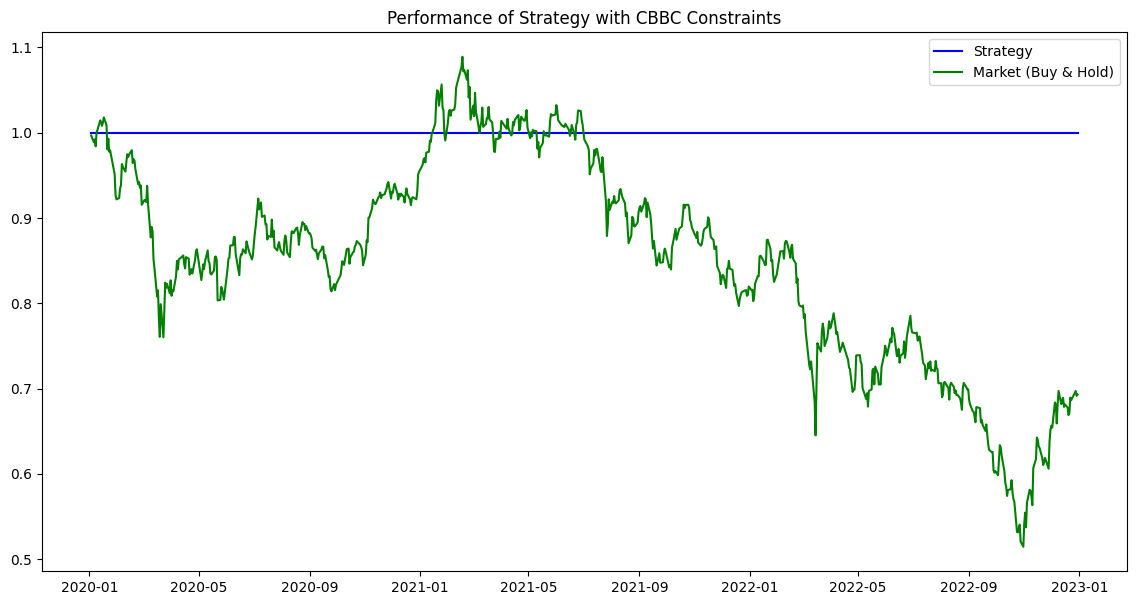

In [14]:
main()